In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# load csv file
data = pd.read_csv("./benchmark_results.csv")
print(data.head())

   size  sparsity  approach      time  overhead
0     8       0.1  ansatz_0  0.007035  0.001521
1     8       0.1  ansatz_1  0.002609  0.001159
2     8       0.1  ansatz_2  0.035792  0.021246
3     8       0.3  ansatz_0  0.003655  0.000893
4     8       0.3  ansatz_1  0.001305  0.000519


In [14]:

# Create a pivot table sparsity
pivot_df = data.pivot_table(
    index=["sparsity"],
    columns="approach",
    values="time",
    aggfunc="max",
).reset_index()

print(pivot_df)

approach  sparsity  ansatz_0  ansatz_1  ansatz_2
0              0.1  4.557314  1.768047  1.488839
1              0.3  4.644152  1.156020  1.505826
2              0.5  4.564979  0.629511  1.454994
3              0.7  4.180681  0.250645  1.438203
4              0.9  4.290205  0.066447  1.446091


<Axes: title={'center': 'Benchmark Results'}, xlabel='Sparsity', ylabel='Time (s)'>

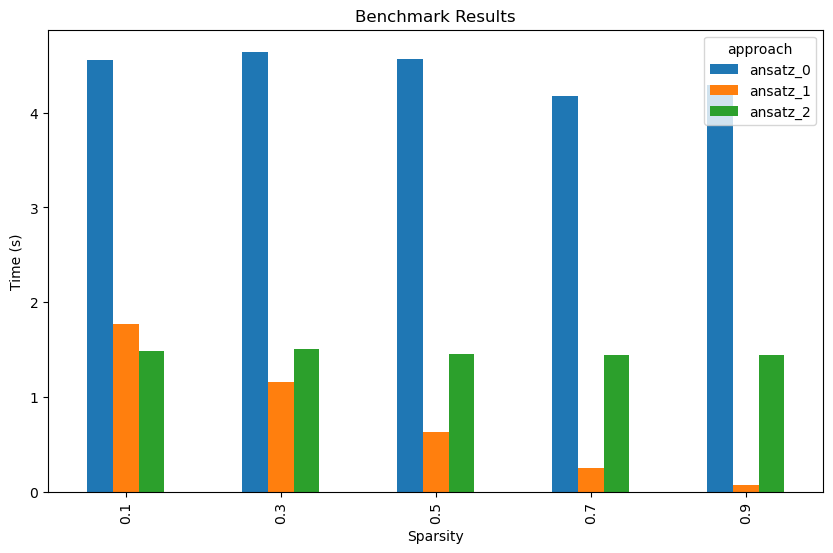

In [17]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(
    x="sparsity",
    kind="bar",
    ax=ax,
    title="Benchmark Results",
    xlabel="Sparsity",
    ylabel="Time (s)",
)

In [18]:
# create pivot table size
pivot_df = data.pivot_table(
    index=["size"],
    columns="approach",
    values="time",
    aggfunc="mean",
).reset_index()

print(pivot_df)

approach  size  ansatz_0  ansatz_1  ansatz_2
0            8  0.004810  0.001695  0.034446
1           16  0.014070  0.002612  0.034634
2           32  0.060155  0.004055  0.039388
3           64  0.148270  0.016283  0.059326
4          128  0.710585  0.107467  0.221745
5          256  4.447466  0.774134  1.466791


<Axes: title={'center': 'Benchmark Results'}, xlabel='Size', ylabel='Time (s)'>

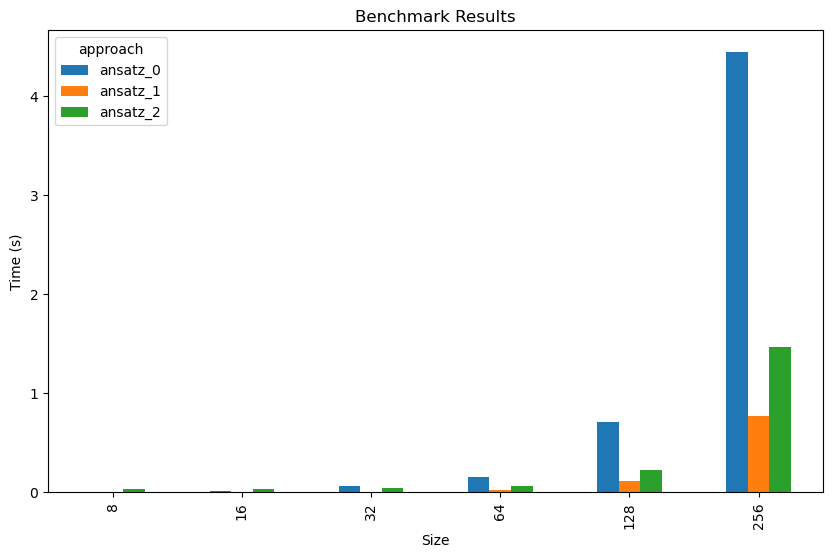

In [19]:
# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
pivot_df.plot(
    x="size",
    kind="bar",
    ax=ax,
    title="Benchmark Results",
    xlabel="Size",
    ylabel="Time (s)",
)

In [20]:

# X-Achsen-Labels erstellen: Kombination aus size und sparsity
data['size_sparsity'] = list(zip(data['size'], data['sparsity']))
x_labels = [f"({s}, {sp})" for s, sp in data['size_sparsity'].unique()]

# Approaches extrahieren
approaches = data['approach'].unique()
num_approaches = len(approaches)
num_groups = len(x_labels)


In [21]:

# Balkenpositionen berechnen
bar_width = 0.8 / num_approaches  # Balkenbreite anpassen
index = np.arange(num_groups)


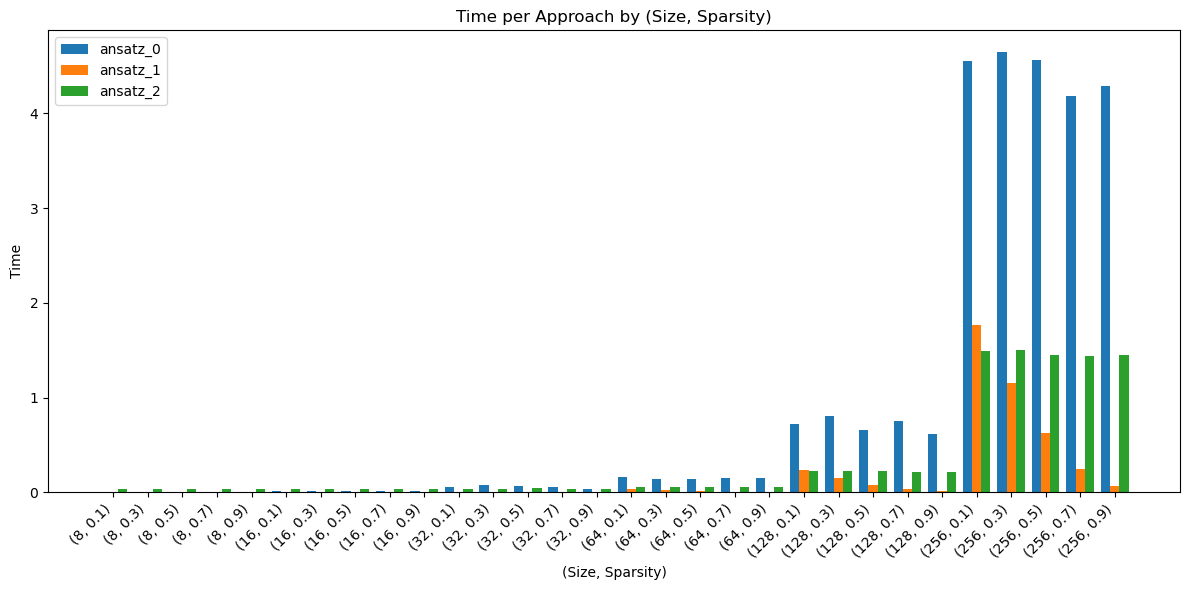

In [22]:

# Plot erstellen
fig, ax = plt.subplots(figsize=(12, 6))

for i, approach in enumerate(approaches):
    approach_data = data[data['approach'] == approach]
    times = approach_data['time']
    # Sicherstellen, dass die Reihenfolge mit x_labels übereinstimmt
    ordered_times = []
    for label in x_labels:
        s, sp = eval(label)  # Konvertiere String zurück zu Tupel
        mask = (approach_data['size'] == s) & (approach_data['sparsity'] == sp)
        ordered_times.append(approach_data[mask]['time'].values[0])
    ax.bar(index + i * bar_width, ordered_times, bar_width, label=approach)

# Beschriftungen
ax.set_xlabel('(Size, Sparsity)')
ax.set_ylabel('Time')
ax.set_title('Time per Approach by (Size, Sparsity)')
ax.set_xticks(index + bar_width * (num_approaches / 2 - 0.5))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

approach  sparsity  ansatz_0  ansatz_1  ansatz_2
0              0.1  0.007035  0.002609  0.035792
1              0.3  0.003655  0.001305  0.033245
2              0.5  0.003511  0.001182  0.035288
3              0.7  0.005497  0.001653  0.033762
4              0.9  0.004352  0.001726  0.034142
approach  sparsity  ansatz_0  ansatz_1  ansatz_2
0              0.1  0.010833  0.003533  0.034656
1              0.3  0.019336  0.002836  0.034238
2              0.5  0.013868  0.002036  0.035345
3              0.7  0.015740  0.003223  0.033904
4              0.9  0.010573  0.001431  0.035028
approach  sparsity  ansatz_0  ansatz_1  ansatz_2
0              0.1  0.057022  0.005947  0.038829
1              0.3  0.074277  0.005104  0.040811
2              0.5  0.071699  0.004222  0.042423
3              0.7  0.061244  0.003595  0.036295
4              0.9  0.036534  0.001408  0.038583
approach  sparsity  ansatz_0  ansatz_1  ansatz_2
0              0.1  0.158489  0.032907  0.061141
1              0.3  

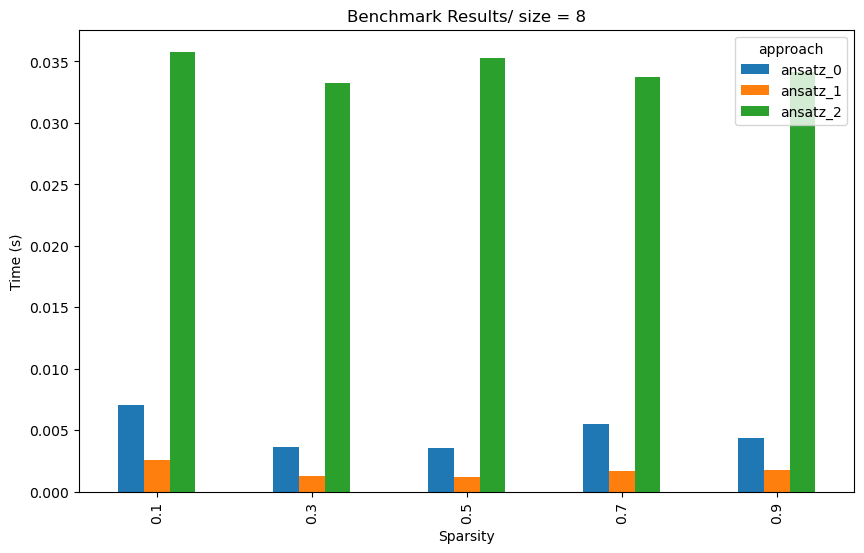

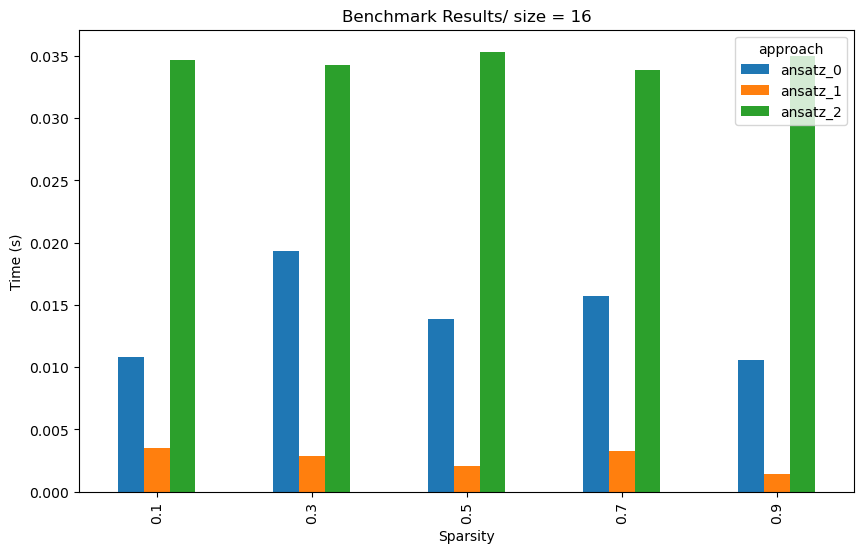

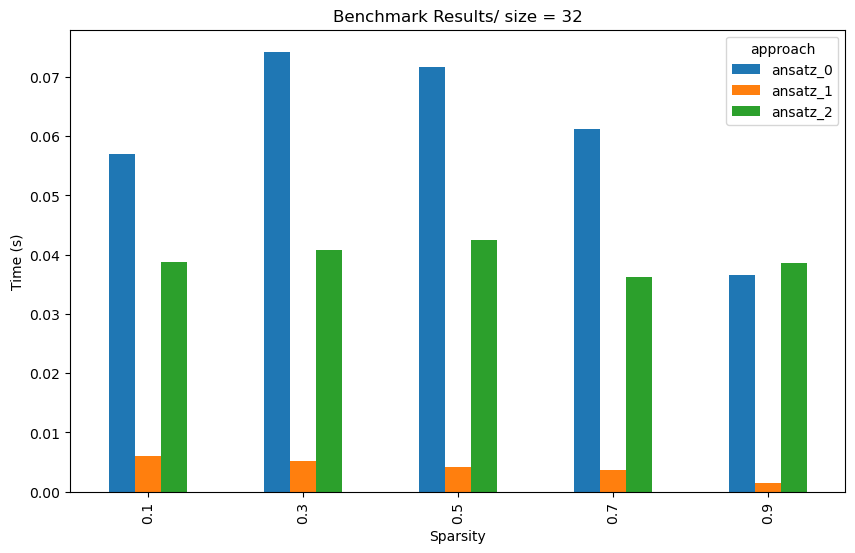

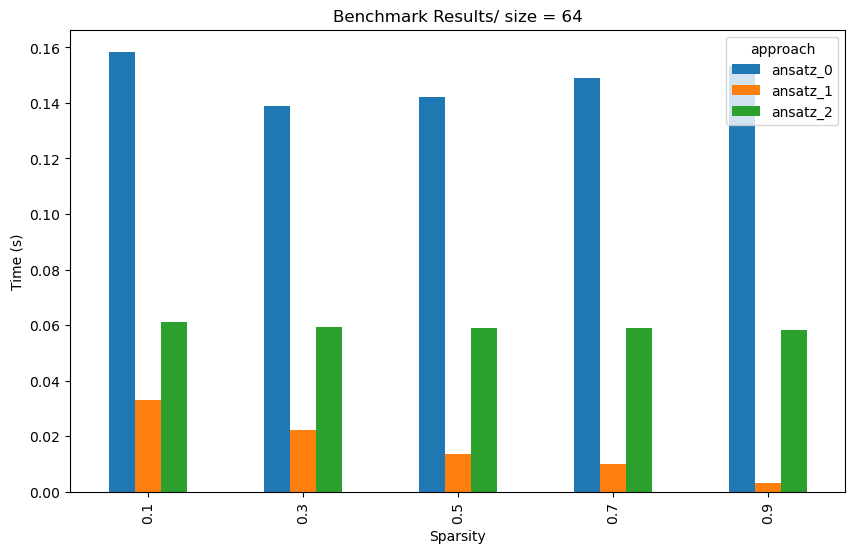

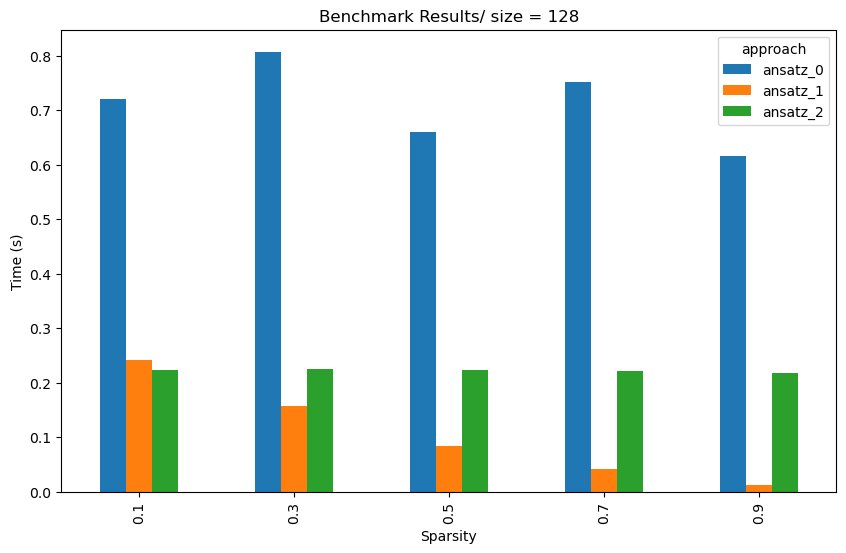

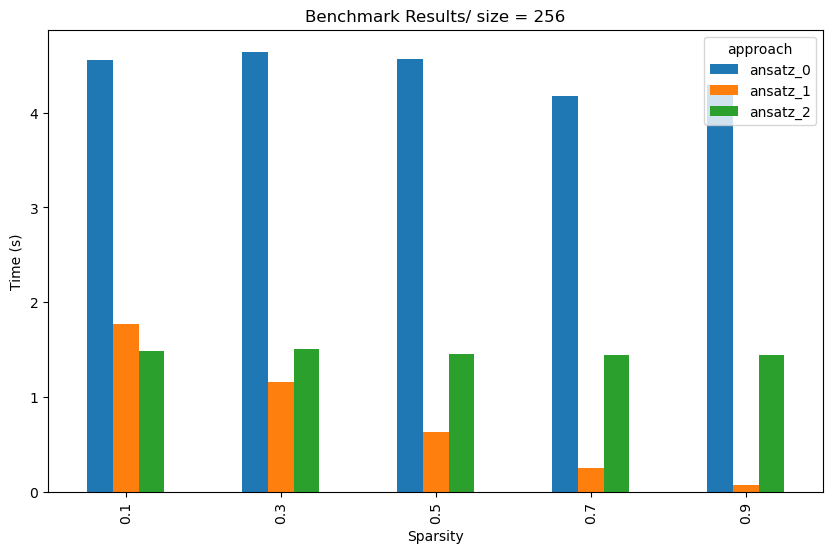

In [23]:

size_list = [8,16,32,64,128,256]


for i in size_list:
    pivot_df = (data[data["size"] == i].pivot_table(
        index=["sparsity"],
        columns="approach",
        values="time",
        aggfunc="mean",
    ).reset_index()
    )

    print(pivot_df)

    fig, ax = plt.subplots(figsize=(10, 6))
    pivot_df.plot(
        x="sparsity",
        kind="bar",
        ax=ax,
        title=f"Benchmark Results/ size = {i}",
        xlabel="Sparsity",
        ylabel="Time (s)",
    )

In [24]:
data[data["sparsity"] == 0.3]

,size,sparsity,approach,time,overhead,size_sparsity
3,8,0.3,ansatz_0,0.003655,0.000893,"(8, 0.3)"
4,8,0.3,ansatz_1,0.001305,0.000519,"(8, 0.3)"
5,8,0.3,ansatz_2,0.033245,0.009309,"(8, 0.3)"
18,16,0.3,ansatz_0,0.019336,0.000926,"(16, 0.3)"
19,16,0.3,ansatz_1,0.002836,0.000787,"(16, 0.3)"
20,16,0.3,ansatz_2,0.034238,0.042313,"(16, 0.3)"
33,32,0.3,ansatz_0,0.074277,0.001294,"(32, 0.3)"
34,32,0.3,ansatz_1,0.005104,0.001306,"(32, 0.3)"
35,32,0.3,ansatz_2,0.040811,0.196847,"(32, 0.3)"
48,64,0.3,ansatz_0,0.138753,0.003455,"(64, 0.3)"


approach  size  ansatz_0  ansatz_1  ansatz_2
0            8  0.007035  0.002609  0.035792
1           16  0.010833  0.003533  0.034656
2           32  0.057022  0.005947  0.038829
3           64  0.158489  0.032907  0.061141
4          128  0.720204  0.241281  0.222425
5          256  4.557314  1.768047  1.488839
approach  size  ansatz_0  ansatz_1  ansatz_2
0            8  0.003655  0.001305  0.033245
1           16  0.019336  0.002836  0.034238
2           32  0.074277  0.005104  0.040811
3           64  0.138753  0.022169  0.059356
4          128  0.807358  0.157801  0.224481
5          256  4.644152  1.156020  1.505826
approach  size  ansatz_0  ansatz_1  ansatz_2
0            8  0.003511  0.001182  0.035288
1           16  0.013868  0.002036  0.035345
2           32  0.071699  0.004222  0.042423
3           64  0.141967  0.013440  0.058971
4          128  0.659273  0.083858  0.223080
5          256  4.564979  0.629511  1.454994
approach  size  ansatz_0  ansatz_1  ansatz_2
0         

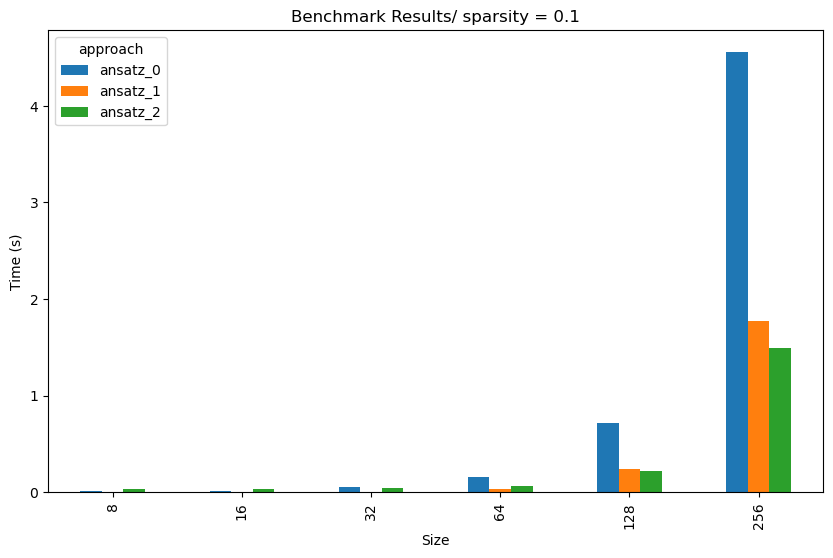

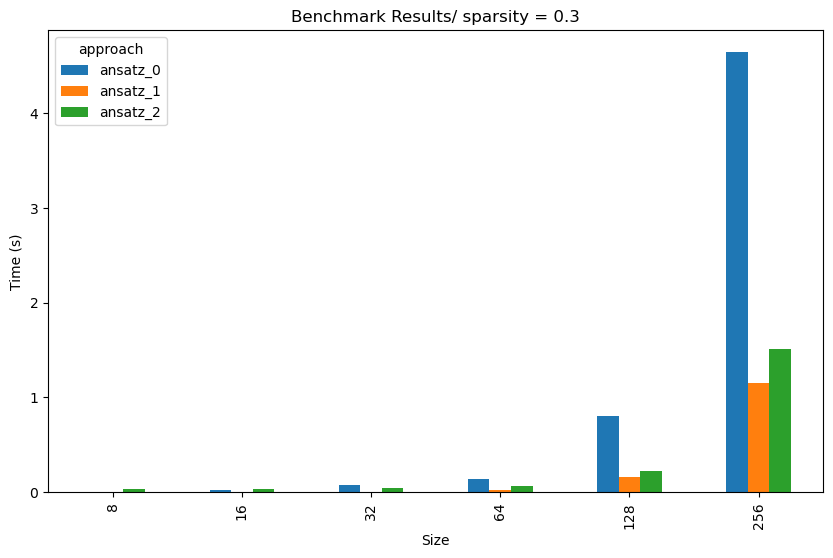

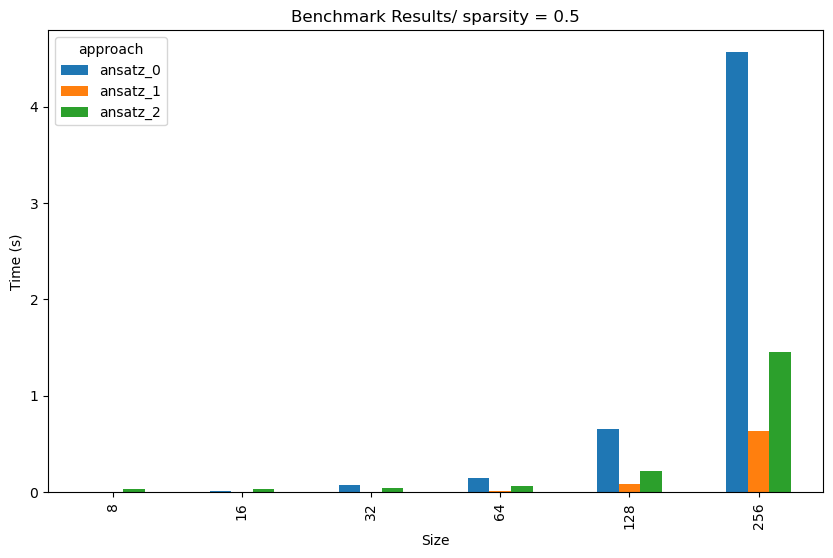

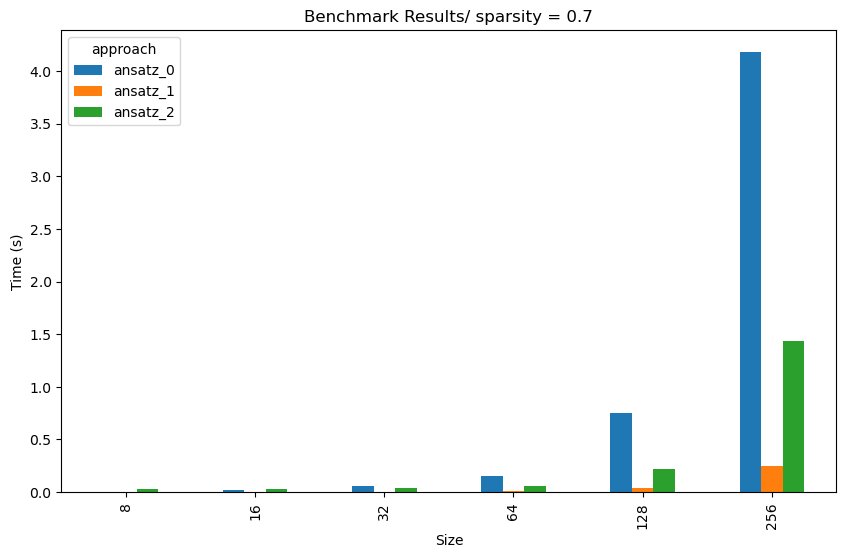

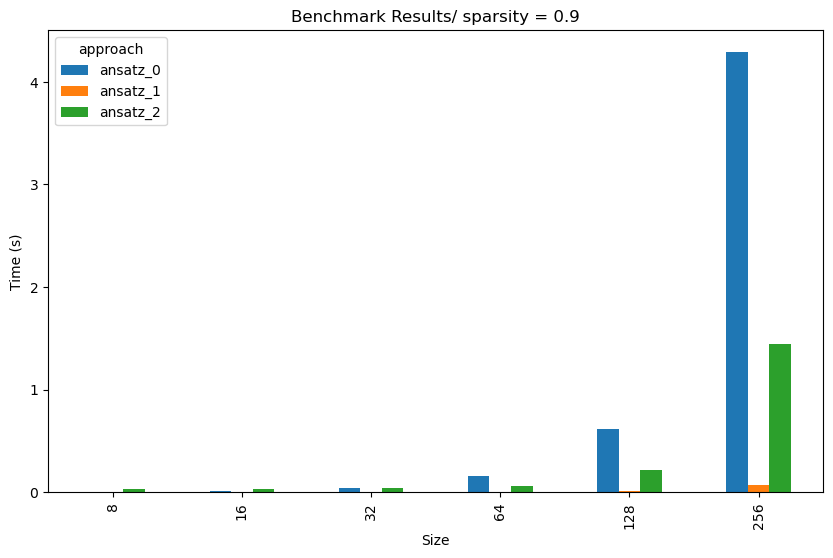

In [25]:
sparsity_list = [0.1, 0.3, 0.5, 0.7, 0.9]


for i in sparsity_list:
    pivot_df = (data[data["sparsity"] == i].pivot_table(
            index=["size"],
            columns="approach",
            values="time",
            aggfunc="mean",
        ).reset_index()
    )

    print(pivot_df)

    fig, ax = plt.subplots(figsize=(10, 6))
    pivot_df.plot(
        x="size",
        kind="bar",
        ax=ax,
        title=f"Benchmark Results/ sparsity = {i}",
        xlabel="Size",
        ylabel="Time (s)",
    )